In [122]:
import numpy as np
import random

from gensim.models import Word2Vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline


In [123]:
model = Word2Vec.load("svmtest.model")

In [126]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)
    
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(vectors)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    plt.scatter(x,y)
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i],
                     (x[i],
                      y[i]),
                      xytext=(5, 2),
                      textcoords='offset points',
                      ha='right',
                      va='bottom')
    plt.show()

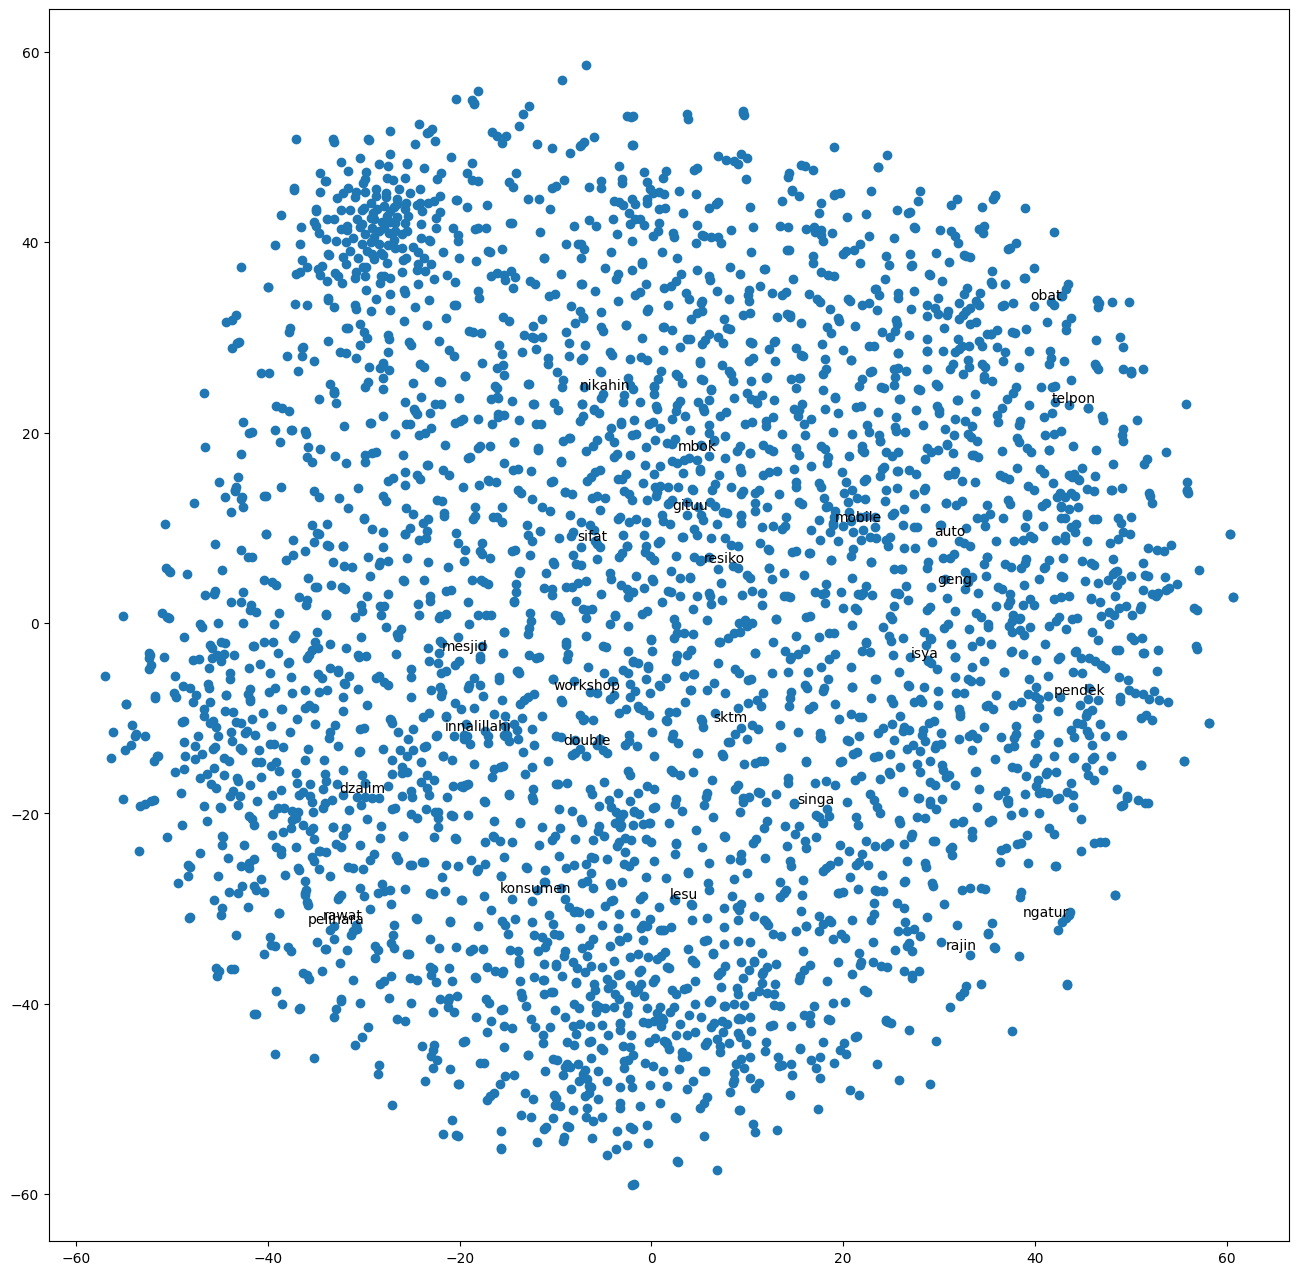

In [127]:
tsne_plot(model)